In [1]:
import numpy as np
import pandas as pd

In [2]:
# reading two csv files
data1 = pd.read_csv('data/train.csv',dtype={'Store':'string', 'StateHoliday':'string'})
data2 = pd.read_csv('data/store.csv',dtype={'Store':'string', 'StoreType':'string', 'Assortment':'string'})
  
# using merge function by setting how='inner'
total = pd.merge(data1, data2, 
                   on='Store', 
                   how='inner')

In [3]:
total

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,2013-01-01,1115,2.0,0.0,0.0,0.0,0.0,a,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1,2013-01-02,1115,3.0,3697.0,305.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
2,2013-01-03,1115,4.0,4297.0,300.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
3,2013-01-04,1115,5.0,4540.0,326.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
4,2013-01-05,1115,6.0,4771.0,339.0,1.0,0.0,0,1.0,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618468,2014-06-26,127,4.0,3335.0,480.0,1.0,0.0,0,0.0,d,a,1350.0,12.0,2005.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
618469,2014-06-27,127,5.0,4724.0,591.0,1.0,0.0,0,0.0,d,a,1350.0,12.0,2005.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
618470,2014-06-28,127,6.0,5398.0,716.0,1.0,0.0,0,0.0,d,a,1350.0,12.0,2005.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
618471,2014-06-29,127,7.0,0.0,0.0,0.0,0.0,0,0.0,d,a,1350.0,12.0,2005.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"


In [4]:
X = total.drop(columns='Sales')
y = total.loc[:,'Sales']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
todo = [y_train, X_train]

In [8]:
df_train = pd.concat(todo, axis=1)

In [9]:
from pandas_profiling import ProfileReport

In [10]:
#prof1 = ProfileReport(df_train)

In [11]:
#prof1.to_file(output_file='prof1.html')

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494778 entries, 290482 to 121958
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      480036 non-null  float64
 1   Date                       494778 non-null  object 
 2   Store                      494778 non-null  string 
 3   DayOfWeek                  480052 non-null  float64
 4   Customers                  479918 non-null  float64
 5   Open                       479943 non-null  float64
 6   Promo                      479877 non-null  float64
 7   StateHoliday               479882 non-null  string 
 8   SchoolHoliday              479727 non-null  float64
 9   StoreType                  494778 non-null  string 
 10  Assortment                 494778 non-null  string 
 11  CompetitionDistance        493450 non-null  float64
 12  CompetitionOpenSinceMonth  337400 non-null  float64
 13  CompetitionOpenSinceYear

In [13]:
df_train.astype

<bound method NDFrame.astype of           Sales        Date Store  DayOfWeek  Customers  Open  Promo  \
290482   5982.0  2013-11-19   175        2.0      666.0   1.0    1.0   
139915   8256.0  2013-04-13   468        6.0     1080.0   1.0    0.0   
318657   4714.0  2013-07-22   941        1.0      590.0   1.0    0.0   
361617  13744.0  2014-01-06   894        1.0     1291.0   1.0    1.0   
374646   7308.0  2013-05-24   975        5.0      705.0   1.0    0.0   
...         ...         ...   ...        ...        ...   ...    ...   
110268   6523.0  2014-01-13   536        1.0      789.0   1.0    0.0   
259178  10356.0  2014-05-09   256        5.0     1257.0   1.0    NaN   
365838   2763.0  2013-06-25   873        2.0      372.0   1.0    0.0   
131932   1581.0  2014-04-05   483        6.0      206.0   1.0    0.0   
121958   4370.0  2014-01-27   433        1.0      567.0   1.0    0.0   

       StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
290482            0    

In [14]:
df_train = df_train.dropna(subset =['Sales'])

In [15]:
df_train['Sales'].isnull().value_counts()

False    480036
Name: Sales, dtype: int64

In [16]:
df_train = df_train.drop(columns=['Customers','PromoInterval'])

In [17]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,<NA>,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,NaN,a,a,2040.0,11.0,2008.0,0,NaN,NaN
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0


In [18]:
df_train.isnull().sum()

Sales                             0
Date                              0
Store                             0
DayOfWeek                     14287
Open                          14391
Promo                         14491
StateHoliday                  14465
SchoolHoliday                 14612
StoreType                         0
Assortment                        0
CompetitionDistance            1277
CompetitionOpenSinceMonth    152707
CompetitionOpenSinceYear     152707
Promo2                            0
Promo2SinceWeek              235438
Promo2SinceYear              235438
dtype: int64

In [19]:
#competitor distance

df_train['CompetitionDistance']=df_train.loc[:,'CompetitionDistance'].fillna(df_train['CompetitionDistance'].median())

In [20]:
df_train.isnull().sum()

Sales                             0
Date                              0
Store                             0
DayOfWeek                     14287
Open                          14391
Promo                         14491
StateHoliday                  14465
SchoolHoliday                 14612
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    152707
CompetitionOpenSinceYear     152707
Promo2                            0
Promo2SinceWeek              235438
Promo2SinceYear              235438
dtype: int64

In [21]:
df_train['Open'].isna().sum()

14391

In [22]:
df_train.loc[df_train['Sales']> 0, 'Open']=1

In [23]:
df_train.loc[df_train['Sales']== 0, 'Open']=0

In [24]:
df_train['Open'].value_counts()

1.0    397880
0.0     82156
Name: Open, dtype: int64

In [25]:
df_train[df_train['Sales'] > 0]

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,<NA>,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,NaN,a,a,2040.0,11.0,2008.0,0,NaN,NaN
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0


In [26]:
df_train['StateHoliday'] = df_train.loc[:,'StateHoliday'].fillna('0')

In [27]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,NaN,a,a,2040.0,11.0,2008.0,0,NaN,NaN
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0


In [28]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,NaN,a,a,2040.0,11.0,2008.0,0,NaN,NaN
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0


In [29]:
df_train['StateHoliday'] = df_train['StateHoliday'].replace(0.0, '0')

In [30]:
df_train


,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,NaN,a,a,2040.0,11.0,2008.0,0,NaN,NaN
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0


In [31]:
df_train.StateHoliday.unique()

<StringArray>
['0', 'a', 'c', 'b']
Length: 4, dtype: string

In [32]:
df_train['SchoolHoliday'].isnull().value_counts()

False    465424
True      14612
Name: SchoolHoliday, dtype: int64

In [33]:
df_train['SchoolHoliday'] = df_train['SchoolHoliday'].fillna(0)

In [34]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,0.0,a,a,2040.0,11.0,2008.0,0,NaN,NaN
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0


In [35]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480036 entries, 290482 to 121958
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sales                      480036 non-null  float64
 1   Date                       480036 non-null  object 
 2   Store                      480036 non-null  string 
 3   DayOfWeek                  465749 non-null  float64
 4   Open                       480036 non-null  float64
 5   Promo                      465545 non-null  float64
 6   StateHoliday               480036 non-null  string 
 7   SchoolHoliday              480036 non-null  float64
 8   StoreType                  480036 non-null  string 
 9   Assortment                 480036 non-null  string 
 10  CompetitionDistance        480036 non-null  float64
 11  CompetitionOpenSinceMonth  327329 non-null  float64
 12  CompetitionOpenSinceYear   327329 non-null  float64
 13  Promo2                  

In [36]:
df_train['Promo'].isnull().value_counts()

False    465545
True      14491
Name: Promo, dtype: int64

In [37]:
df_train['DayOfWeek'].value_counts()

2.0    66966
4.0    66755
3.0    66754
6.0    66464
7.0    66388
1.0    66344
5.0    66078
Name: DayOfWeek, dtype: int64

In [38]:
df_train.index

Int64Index([290482, 139915, 318657, 361617, 374646,    166, 194544, 503508,
             45019,  29651,
            ...
            191335,  87498, 521430, 137337,  54886, 110268, 259178, 365838,
            131932, 121958],
           dtype='int64', length=480036)

In [39]:
df_train['Date'] = pd.to_datetime(df_train['Date'])
df_train['Year'] = pd.DatetimeIndex(df_train['Date']).year

In [40]:
df_train['Month'] = pd.DatetimeIndex(df_train['Date']).month

In [41]:
df_train['Day'] = pd.DatetimeIndex(df_train['Date']).day

In [42]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN,2013,11,19
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN,2013,4,13
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0,2013,7,22
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN,2014,1,6
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0,2013,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0,2014,1,13
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0,2014,5,9
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,0.0,a,a,2040.0,11.0,2008.0,0,NaN,NaN,2013,6,25
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0,2014,4,5


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480036 entries, 290482 to 121958
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Sales                      480036 non-null  float64       
 1   Date                       480036 non-null  datetime64[ns]
 2   Store                      480036 non-null  string        
 3   DayOfWeek                  465749 non-null  float64       
 4   Open                       480036 non-null  float64       
 5   Promo                      465545 non-null  float64       
 6   StateHoliday               480036 non-null  string        
 7   SchoolHoliday              480036 non-null  float64       
 8   StoreType                  480036 non-null  string        
 9   Assortment                 480036 non-null  string        
 10  CompetitionDistance        480036 non-null  float64       
 11  CompetitionOpenSinceMonth  327329 non-null  flo

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480036 entries, 290482 to 121958
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   Sales                      480036 non-null  float64       
 1   Date                       480036 non-null  datetime64[ns]
 2   Store                      480036 non-null  string        
 3   DayOfWeek                  465749 non-null  float64       
 4   Open                       480036 non-null  float64       
 5   Promo                      465545 non-null  float64       
 6   StateHoliday               480036 non-null  string        
 7   SchoolHoliday              480036 non-null  float64       
 8   StoreType                  480036 non-null  string        
 9   Assortment                 480036 non-null  string        
 10  CompetitionDistance        480036 non-null  float64       
 11  CompetitionOpenSinceMonth  327329 non-null  flo

In [45]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN,2013,11,19
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN,2013,4,13
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0,2013,7,22
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN,2014,1,6
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0,2013,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0,2014,1,13
259178,10356.0,2014-05-09,256,5.0,1.0,NaN,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0,2014,5,9
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,0.0,a,a,2040.0,11.0,2008.0,0,NaN,NaN,2013,6,25
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0,2014,4,5


In [46]:
#prof2 = ProfileReport(df_train)

In [47]:
#prof2.to_file(output_file='prof2.html')

In [48]:
df_train['Promo'].isna().value_counts()

False    465545
True      14491
Name: Promo, dtype: int64

In [49]:
df_train['Promo'] = df_train.loc[:,'Promo'].fillna(0)

In [50]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Year,Month,Day
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,NaN,NaN,0,NaN,NaN,2013,11,19
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,9.0,2012.0,0,NaN,NaN,2013,4,13
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,12.0,2011.0,1,31.0,2013.0,2013,7,22
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,190.0,11.0,2012.0,0,NaN,NaN,2014,1,6
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,NaN,NaN,1,14.0,2011.0,2013,5,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,9.0,2002.0,1,31.0,2013.0,2014,1,13
259178,10356.0,2014-05-09,256,5.0,1.0,0.0,0,0.0,a,c,80.0,9.0,2005.0,1,10.0,2014.0,2014,5,9
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,0.0,a,a,2040.0,11.0,2008.0,0,NaN,NaN,2013,6,25
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,9.0,2011.0,1,13.0,2010.0,2014,4,5


In [51]:
df_train['Promo2'].isna().value_counts()

False    480036
Name: Promo2, dtype: int64

In [52]:
from datetime import datetime 
from datetime import date 

## Create a new column that is a real date.
## For a time series we need real dates.
df_train['sales_date'] = pd.to_datetime(df_train['Date'])
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618473 entries, 0 to 618472
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       618473 non-null  object 
 1   Store                      618473 non-null  string 
 2   DayOfWeek                  600036 non-null  float64
 3   Sales                      600028 non-null  float64
 4   Customers                  599957 non-null  float64
 5   Open                       599832 non-null  float64
 6   Promo                      599791 non-null  float64
 7   StateHoliday               599873 non-null  string 
 8   SchoolHoliday              599686 non-null  float64
 9   StoreType                  618473 non-null  string 
 10  Assortment                 618473 non-null  string 
 11  CompetitionDistance        616838 non-null  float64
 12  CompetitionOpenSinceMonth  422043 non-null  float64
 13  CompetitionOpenSinceYear   42

In [53]:
def create_a_timeseries_dummy_from_weeks(df, var_week, var_year, date_new, var_dummy):
    #Create a date out of the Promo2 variables so that we can create a time-series variable for Promo2
    df['temp_date'] = df[var_year] * 1000 + df[var_week]  * 10 + 0
    df[date_new] = pd.to_datetime(df['temp_date'], format='%Y%W%w')
    ## Create an array to Group the data by group. and make dummy Store by Store
    for Store, grouped in df.groupby('Store'):
      if [df['sales_date'] >= df[date_new]]:
        df[var_dummy] = 1
      else:
        df[var_dummy] = 0
    df = df.drop(columns=['temp_date'])
    df.head()

    
def create_a_timeseries_dummy_from_months(df, var_month, var_year, date_new, var_dummy):
    #Create a date out of the Competition variables so that we can create a time-series variable for Competitioin
    df['temp_date'] = df[var_year] * 1000 + df[var_month]  * 10 + 0
    ## Create an array to Group the data by group. and make dummy Store by Store
    df[date_new] = pd.to_datetime(df['temp_date'], format='%Y%m%w')
    for Store, grouped in df.groupby('Store'):
      if [df['sales_date'] >= df[date_new]]:
        df[var_dummy] = 1
      else:
        df[var_dummy] = 0
    df = df.drop(columns=['temp_date'])    
    df.head()

In [54]:
create_a_timeseries_dummy_from_weeks(df=df_train        ,
                          var_week='Promo2SinceWeek'  ,
                          var_year='Promo2SinceYear'  ,
                          date_new='Promo2_start_date',
                          var_dummy='Promo2_yes'
                                    )

In [55]:
create_a_timeseries_dummy_from_months(df=df_train                  ,
                          var_month='CompetitionOpenSinceMonth'  ,
                          var_year='CompetitionOpenSinceYear'   ,
                          date_new='Competition_start_date'    ,
                          var_dummy='Competition_yes'
                                    )


In [56]:
df_train

,Sales,Date,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceYear,Year,Month,Day,sales_date,temp_date,Promo2_start_date,Promo2_yes,Competition_start_date,Competition_yes
290482,5982.0,2013-11-19,175,2.0,1.0,1.0,0,0.0,c,a,...,NaN,2013,11,19,2013-11-19,NaN,NaT,1,NaT,1
139915,8256.0,2013-04-13,468,6.0,1.0,0.0,0,0.0,c,c,...,NaN,2013,4,13,2013-04-13,2012090.0,NaT,1,2012-09-01,1
318657,4714.0,2013-07-22,941,1.0,1.0,0.0,0,0.0,a,a,...,2013.0,2013,7,22,2013-07-22,2011120.0,2013-08-11,1,2011-12-01,1
361617,13744.0,2014-01-06,894,1.0,1.0,1.0,0,1.0,a,a,...,NaN,2014,1,6,2014-01-06,2012110.0,NaT,1,2012-11-01,1
374646,7308.0,2013-05-24,975,5.0,1.0,0.0,0,0.0,a,c,...,2011.0,2013,5,24,2013-05-24,NaN,2011-04-10,1,NaT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,2014-01-13,536,1.0,1.0,0.0,0,0.0,a,c,...,2013.0,2014,1,13,2014-01-13,2002090.0,2013-08-11,1,2002-09-01,1
259178,10356.0,2014-05-09,256,5.0,1.0,0.0,0,0.0,a,c,...,2014.0,2014,5,9,2014-05-09,2005090.0,2014-03-16,1,2005-09-01,1
365838,2763.0,2013-06-25,873,2.0,1.0,0.0,0,0.0,a,a,...,NaN,2013,6,25,2013-06-25,2008110.0,NaT,1,2008-11-01,1
131932,1581.0,2014-04-05,483,6.0,1.0,0.0,0,0.0,a,c,...,2010.0,2014,4,5,2014-04-05,2011090.0,2010-04-04,1,2011-09-01,1


In [57]:
df_train = df_train.drop(columns=['Promo2_start_date','Competition_start_date','temp_date','Date', 'Promo2'])

In [58]:
df_train = df_train.drop(columns=['CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','CompetitionOpenSinceMonth'])

In [59]:
#df_train = df_train.drop(columns=['CompetitionOpenSinceMonth'])

In [60]:
df_train

,Sales,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,sales_date,Promo2_yes,Competition_yes
290482,5982.0,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,2013,11,19,2013-11-19,1,1
139915,8256.0,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,2013,4,13,2013-04-13,1,1
318657,4714.0,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,2013,7,22,2013-07-22,1,1
361617,13744.0,894,1.0,1.0,1.0,0,1.0,a,a,190.0,2014,1,6,2014-01-06,1,1
374646,7308.0,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,2013,5,24,2013-05-24,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,6523.0,536,1.0,1.0,0.0,0,0.0,a,c,4700.0,2014,1,13,2014-01-13,1,1
259178,10356.0,256,5.0,1.0,0.0,0,0.0,a,c,80.0,2014,5,9,2014-05-09,1,1
365838,2763.0,873,2.0,1.0,0.0,0,0.0,a,a,2040.0,2013,6,25,2013-06-25,1,1
131932,1581.0,483,6.0,1.0,0.0,0,0.0,a,c,2310.0,2014,4,5,2014-04-05,1,1


In [61]:
pip list

Package                            Version
---------------------------------- -----------------
alabaster                          0.7.12
anaconda-client                    1.8.0
anaconda-navigator                 2.1.0
anaconda-project                   0.10.1
anyio                              2.2.0
appdirs                            1.4.4
applaunchservices                  0.2.1
appnope                            0.1.2
appscript                          1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
asn1crypto                         1.4.0
astroid                            2.6.6
astropy                            4.3.1
async-generator                    1.10
atomicwrites                       1.4.0
attrs                              21.2.0
autopep8                           1.5.6
Babel                              2.9.1
backcall                           0.2.0
backports.functools-lru-cache      1.6.4
backports.shutil-get-terminal-size 1.0.

Note: you may need to restart the kernel to use updated packages.


In [62]:
pip install category-encoders==2.3.0

Note: you may need to restart the kernel to use updated packages.


In [63]:
import category_encoders as ce

In [133]:
#df_train = ce_one.fit_transform(df_train)


ce_one = ce.OneHotEncoder(cols=['StoreType'])
df_train = ce_one.fit_transform(df_train)

In [65]:
df_train.columns

Index(['Sales', 'Store', 'DayOfWeek', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Year', 'Month', 'Day', 'sales_date', 'Promo2_yes', 'Competition_yes'],
      dtype='object')

In [66]:
df_train.head()

,Sales,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Year,Month,Day,sales_date,Promo2_yes,Competition_yes
290482,5982.0,175,2.0,1.0,1.0,0,0.0,c,a,4130.0,2013,11,19,2013-11-19,1,1
139915,8256.0,468,6.0,1.0,0.0,0,0.0,c,c,5260.0,2013,4,13,2013-04-13,1,1
318657,4714.0,941,1.0,1.0,0.0,0,0.0,a,a,1200.0,2013,7,22,2013-07-22,1,1
361617,13744.0,894,1.0,1.0,1.0,0,1.0,a,a,190.0,2014,1,6,2014-01-06,1,1
374646,7308.0,975,5.0,1.0,0.0,0,0.0,a,c,9630.0,2013,5,24,2013-05-24,1,1


In [85]:
p = df_train[["Sales", "sales_date"]]

In [77]:
from prophet import Prophet

In [119]:
# from the prophet documentation every variables should have specific names
sales = p.rename(columns = {'sales_date': 'ds',
                                'Sales': 'y'})
sales.head()

,y,ds
290482,5982.0,2013-11-19
139915,8256.0,2013-04-13
318657,4714.0,2013-07-22
361617,13744.0,2014-01-06
374646,7308.0,2013-05-24


NameError: name 'plt' is not defined

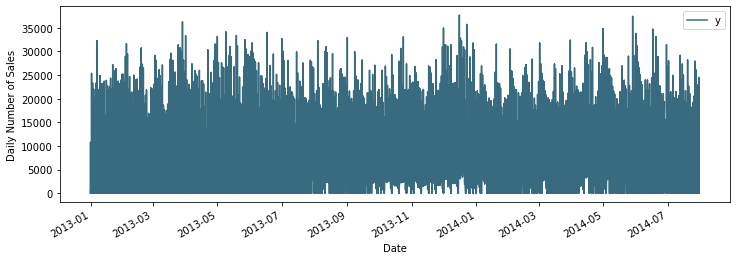

In [120]:
# plot daily sales
ax = sales.set_index('ds').plot(figsize = (12, 4), color = '#386B7F')
ax.set_ylabel('Daily Number of Sales')
ax.set_xlabel('Date')
plt.show()

In [116]:
# remove closed stores and those with no sales
df_train = df_train[(df_train["Open"] != 0) & (df_train['Sales'] != 0)]

# sales for the store number 1 (StoreType C)
sales = df_train[df_train.Store == 1].loc[:, ['sales_date', 'Sales']]

# reverse to the order: from 2013 to 2015
sales = sales.sort_index(ascending = False)

# to datetime64
sales['sales_date'] = pd.DatetimeIndex(sales['sales_date'])
sales.dtypes

sales_date    datetime64[ns]
Sales                float64
dtype: object

In [117]:
# Modeling holiday. create holidays dataframe
state_dates = df_train[(df_train.StateHoliday == '0') |(df_train.StateHoliday == 'a') | (df_train.StateHoliday == 'b') & (df_train.StateHoliday == 'c')].loc[:, 'sales_date'].values
school_dates = df_train[df_train.SchoolHoliday == 1].loc[:, 'sales_date'].values

state = pd.DataFrame({'holiday': 'state_holiday',
                      'ds': pd.to_datetime(state_dates)})
school = pd.DataFrame({'holiday': 'school_holiday',
                      'ds': pd.to_datetime(school_dates)})

holidays = pd.concat((state, school))      
holidays.head()

,holiday,ds
0,state_holiday,2013-11-19
1,state_holiday,2013-04-13
2,state_holiday,2013-07-22
3,state_holiday,2014-01-06
4,state_holiday,2013-05-24


In [127]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.80, 
                   holidays = holidays, daily_seasonality=False, weekly_seasonality=True, yearly_seasonality=True)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(7)


Initial log joint probability = -3823.09
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.
Error evaluating model log probability: Non-finite gradient.

      99        985262     0.0048111       20593.3           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        985359   0.000344723       2689.33           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        985509    0.00730393       7265.46           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        985570    0.00196596       2045.58           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        985641     0

,ds
612,2014-09-05
613,2014-09-06
614,2014-09-07
615,2014-09-08
616,2014-09-09
617,2014-09-10
618,2014-09-11


 log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        986822      0.025636       7742.07       3.213      0.3213     1921   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1779        986871   2.64521e-05       370.481      0.9473      0.9473     2010   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


In [128]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
612,2014-09-05,1168.227627,-3066.665591,5726.960347
613,2014-09-06,339.612676,-3775.216533,4649.726998
614,2014-09-07,-5113.896592,-9511.925907,-476.855632
615,2014-09-08,2440.420927,-1905.885549,7015.678095
616,2014-09-09,1498.376677,-3130.440769,6285.365345
617,2014-09-10,1301.263784,-3162.664740,5996.291941
618,2014-09-11,1025.616377,-3645.455739,5746.962839


In [129]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

In [130]:
fc.head()

,ds,yhat
0,2013-01-01,5476.364869
1,2013-01-02,5308.406360
2,2013-01-03,5050.040150
3,2013-01-04,6001.189155
4,2013-01-05,5187.571161


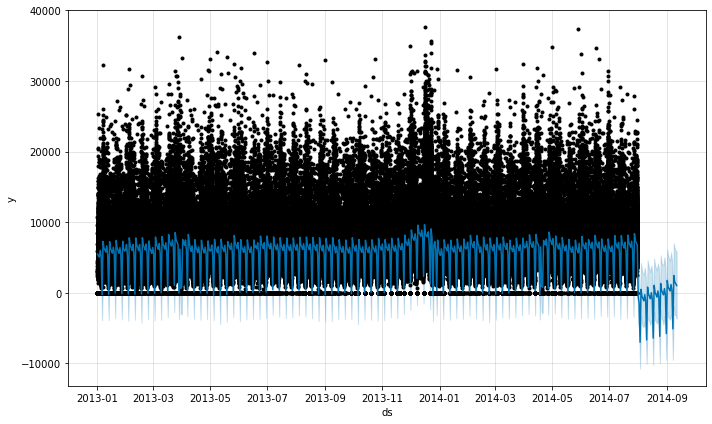

In [131]:
# visualizing predicions
my_model.plot(forecast);
#Prophet plots the observed values of our time series (the black dots), the forecasted values (blue line) and 
#the uncertainty intervals of our forecasts (the blue shaded regions).

In [132]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [ ]:
linear_model = LinearRegression().fit(train_x_scaled, train_y)
validate_y_pred = linear_model.predict(validate_x_scaled)
rmse = mean_squared_error(validate_y, validate_y_pred, squared=False)
rmse